In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import plotly.express as px

In [19]:
# Load the dfset
file_path = 'filtered_global_education_world_happiness_average.csv'
df = pd.read_csv(file_path)

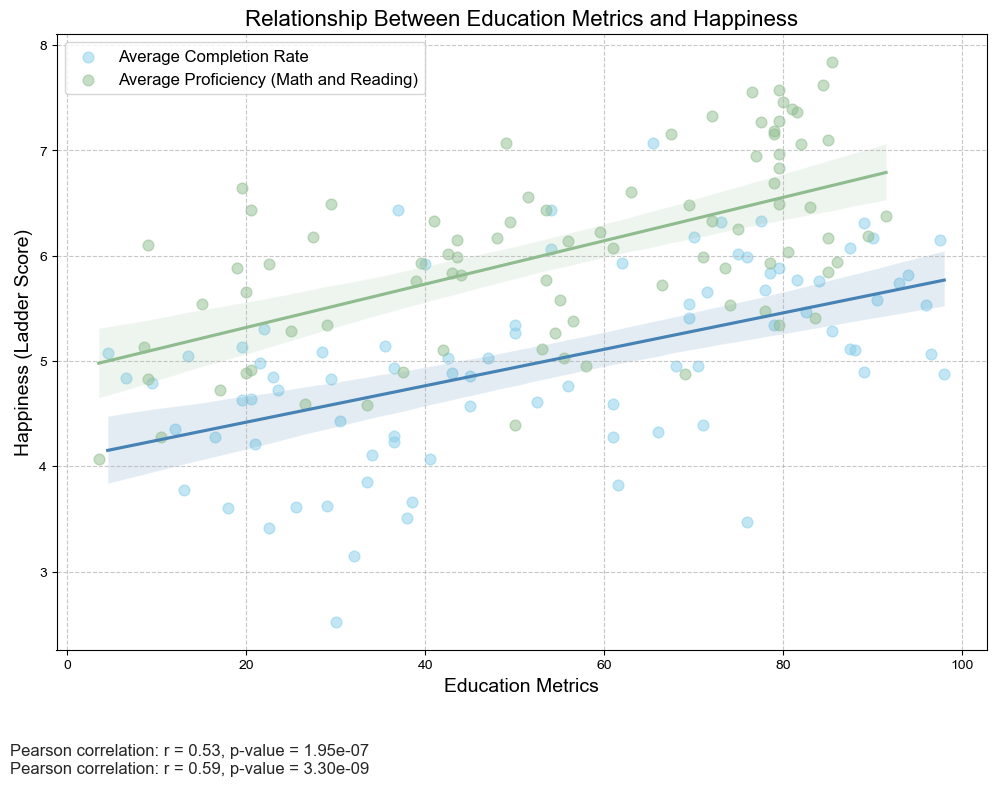

In [20]:
# Calculate the Average Completion Rate
df['Average_Completion_Rate'] = df[['Average_Completion_Rate_Male', 'Average_Completion_Rate_Female']].mean(axis=1)

# Filter out entries with 0 values in the Average Completion Rate
filtered_data = df[df['Average_Completion_Rate'] != 0]

# Calculate the Average Proficiency (Math and Reading)
df['Average_Proficiency'] = df[['Lower_Secondary_End_Proficiency_Reading', 'Lower_Secondary_End_Proficiency_Math']].mean(axis=1)

# Filter out entries with 0 values in the Average Proficiency
filtered_proficiency_data = df[df['Average_Proficiency'] != 0]

# Calculate Pearson correlation coefficients and p-values
r_completion, p_value_completion = pearsonr(filtered_data['Average_Completion_Rate'], filtered_data['Ladder score'])
r_proficiency, p_value_proficiency = pearsonr(filtered_proficiency_data['Average_Proficiency'], filtered_proficiency_data['Ladder score'])

# Create a combined scatter plot with regression lines for both variables with improved aesthetics
plt.figure(figsize=(12, 8))

# Plot Average Completion Rate and Happiness
sns.regplot(data=filtered_data, x='Average_Completion_Rate', y='Ladder score', 
            scatter_kws={'alpha': 0.5, 's': 60}, line_kws={'color': 'steelblue'}, 
            label='Average Completion Rate', color='skyblue')

# Plot Average Proficiency and Happiness
sns.regplot(data=filtered_proficiency_data, x='Average_Proficiency', y='Ladder score', 
            scatter_kws={'alpha': 0.5, 's': 60}, line_kws={'color': 'darkseagreen'}, 
            label='Average Proficiency (Math and Reading)', color='darkseagreen')

# Add titles and labels with improved aesthetics
plt.title('Relationship Between Education Metrics and Happiness', fontsize=16)
plt.xlabel('Education Metrics', fontsize=14)
plt.ylabel('Happiness (Ladder Score)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Set the style of the plot to improve aesthetics
sns.set_style("whitegrid")

# Display correlation coefficients and p-values in the plot, aligned left and below the x-axis title
plt.gca().text(-0.05, -0.2, 
            f'Pearson correlation: r = {r_completion:.2f}, p-value = {p_value_completion:.2e}\n'
            f'Pearson correlation: r = {r_proficiency:.2f}, p-value = {p_value_proficiency:.2e}',
            fontsize=12, bbox=dict(facecolor='white', alpha=0.5), transform=plt.gca().transAxes, ha='left')

plt.show()

In [32]:
import pandas as pd
import plotly.express as px

# Load the dataset
file_path = 'filtered_global_education_world_happiness_average.csv'
df = pd.read_csv(file_path)

# Filter out countries with any zero values in the relevant columns
filtered_data = df[(df['Lower_Secondary_End_Proficiency_Reading'] != 0) & 
                   (df['Lower_Secondary_End_Proficiency_Math'] != 0)]

# Split the countries into three groups based on Ladder score using qcut
filtered_data['Ladder_Group'] = pd.qcut(filtered_data['Ladder score'], 3, labels=['Low', 'Medium', 'High'])

# Rename proficiency columns for better readability
filtered_data = filtered_data.rename(columns={
    'Lower_Secondary_End_Proficiency_Reading': 'Reading Proficiency',
    'Lower_Secondary_End_Proficiency_Math': 'Math Proficiency'
})

# Select only the proficiency columns for grouping
proficiency_cols = ['Reading Proficiency', 'Math Proficiency']
grouped_data = filtered_data.groupby('Ladder_Group')[proficiency_cols].mean().reset_index()

# Melt the data for easier plotting with plotly
melted_data = grouped_data.melt(id_vars='Ladder_Group', var_name='Proficiency Metric', value_name='Value')

# Create custom color mapping
custom_color_map = {'Low': '#C3DCDB', 'Medium': '#CADCC3', 'High': '#FAEBD7'}

# Create the bar plot using plotly express
fig = px.bar(melted_data, x='Proficiency Metric', y='Value', color='Ladder_Group', 
             barmode='group', title='Comparison of Proficiency in Reading and Math for Low, Medium, and High Ladder Score Groups',
             labels={'Value': 'Values', 'Proficiency Metric': 'Proficiency Metrics'},
             color_discrete_map=custom_color_map)

# Update layout for better aesthetics
fig.update_layout(
    xaxis_title='Proficiency Metrics',
    yaxis_title='Values',
    legend_title_text='Ladder Score Group',
    legend=dict(x=1.05, y=1, traceorder='normal'),
    template="seaborn"
)

# Show the figure
fig.show()


C:\Users\stanp\AppData\Local\Temp\ipykernel_16640\2270894566.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\stanp\AppData\Local\Temp\ipykernel_16640\2270894566.py:23: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\stanp\anaconda3\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [33]:


# Load the dataset
file_path = 'filtered_global_education_world_happiness_average.csv'
df = pd.read_csv(file_path)

# Calculate the Average Completion Rate
df['Average_Completion_Rate'] = df[['Average_Completion_Rate_Male', 'Average_Completion_Rate_Female']].mean(axis=1)

# Calculate the Average OOSR
df['Average_OOSR'] = df[['Average_OOSR_Male', 'Average_OOSR_Female']].mean(axis=1)

# Filter out entries with 0 values in both Completion Rate and OOSR
filtered_proficiency_data = df[(df['Average_Completion_Rate'] != 0) & 
                               (df['Average_OOSR'] != 0)]

# Normalize the 'Freedom to make life choices' for better size differentiation
filtered_proficiency_data['Normalized_Freedom'] = (filtered_proficiency_data['Freedom to make life choices'] - filtered_proficiency_data['Freedom to make life choices'].min()) / \
                                                  (filtered_proficiency_data['Freedom to make life choices'].max() - filtered_proficiency_data['Freedom to make life choices'].min())

# Create a bubble chart with normalized Freedom to make life choices for bubble sizes
fig = px.scatter(filtered_proficiency_data, 
                 x='Average_Completion_Rate', 
                 y='Average_OOSR', 
                 size='Normalized_Freedom', 
                 color='Social support', 
                 hover_name='Country',
                 title='Bubble Chart: Completion Rate and OOSR with Social Support as Bubble Size',
                 labels={
                     'Average_Completion_Rate': 'Average Completion Rate',
                     'Average_OOSR': 'Average OOSR',
                     'Social support': 'Social Support',
                     'Ladder score': 'Happiness (Ladder Score)'
                 },
                 size_max=20,  # Adjust the size_max for desired effect
                 color_continuous_scale='RdYlGn')  # Color scale from red to green

fig.update_layout(title_font_size=16, xaxis_title_font_size=14, yaxis_title_font_size=14)
fig.show()


C:\Users\stanp\AppData\Local\Temp\ipykernel_16640\981337428.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



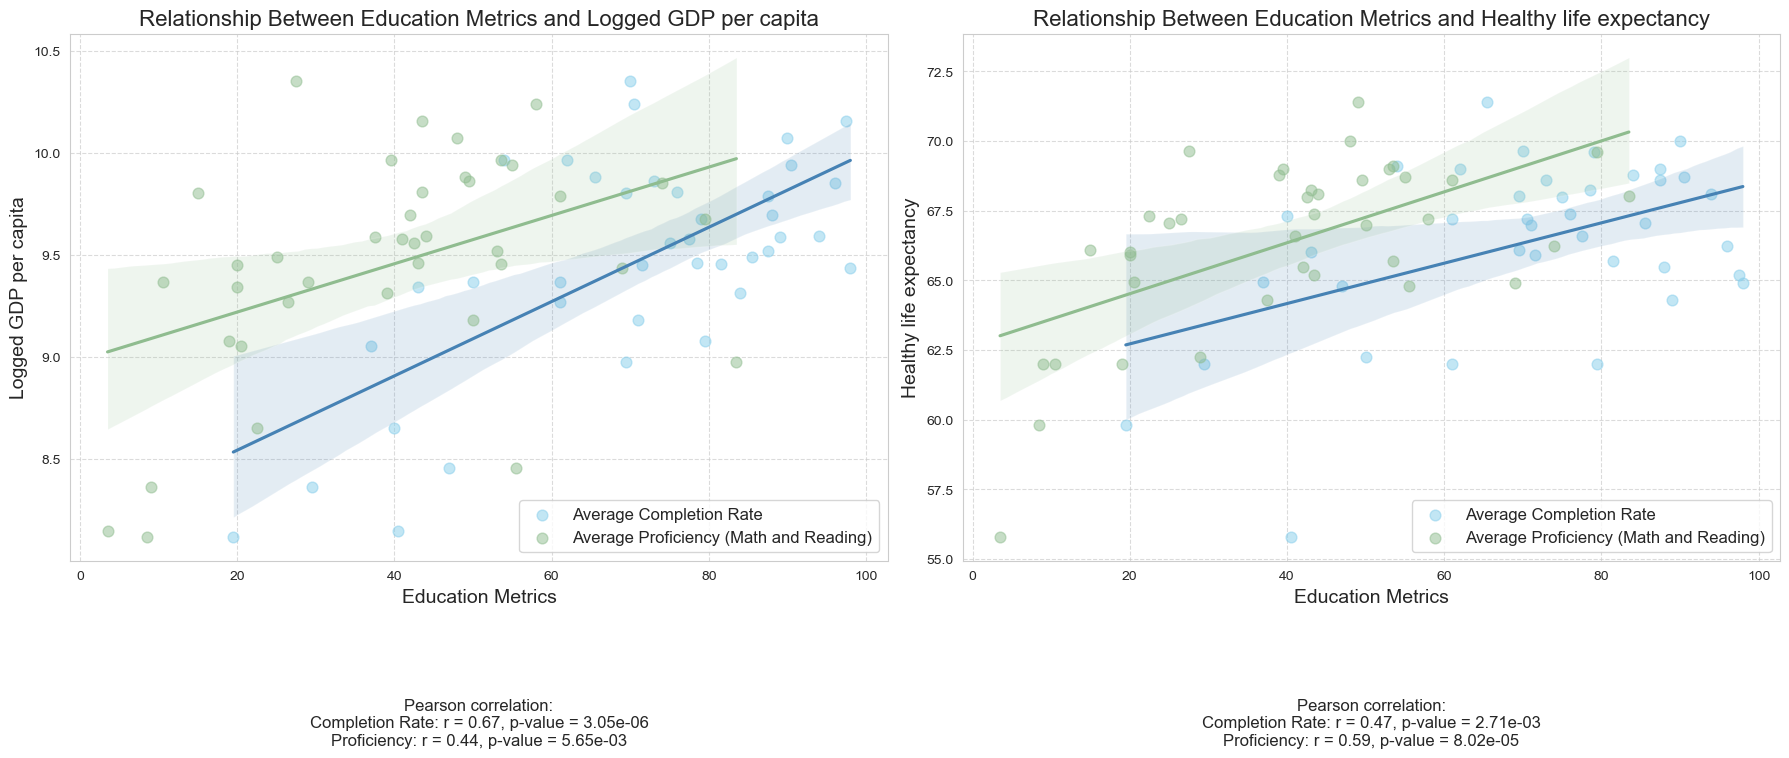

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load the dataset
file_path = 'filtered_global_education_world_happiness_average.csv'
df = pd.read_csv(file_path)

# Calculate the average completion rate
df['Average_Completion_Rate'] = df[['Average_Completion_Rate_Male', 'Average_Completion_Rate_Female']].mean(axis=1)

# Calculate the average proficiency
df['Average_Proficiency'] = df[['Lower_Secondary_End_Proficiency_Reading', 'Lower_Secondary_End_Proficiency_Math']].mean(axis=1)

# Filter out rows where 'Logged GDP per capita', 'Average_Completion_Rate', 'Average_Proficiency', and 'Healthy life expectancy' are 0
filtered_data = df[(df['Logged GDP per capita'] != 0) & 
                   (df['Average_Completion_Rate'] != 0) & 
                   (df['Average_Proficiency'] != 0) & 
                   (df['Healthy life expectancy'] != 0)]

# Create a combined plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Plot the relationship between Average Completion Rate and Logged GDP per capita
sns.regplot(data=filtered_data, x='Average_Completion_Rate', y='Logged GDP per capita', 
            scatter_kws={'alpha': 0.5, 's': 60}, line_kws={'color': 'steelblue'}, 
            label='Average Completion Rate', color='skyblue', ax=ax1)
# Plot the relationship between Average Proficiency and Logged GDP per capita
sns.regplot(data=filtered_data, x='Average_Proficiency', y='Logged GDP per capita', 
            scatter_kws={'alpha': 0.5, 's': 60}, line_kws={'color': 'darkseagreen'}, 
            label='Average Proficiency (Math and Reading)', color='darkseagreen', ax=ax1)

# Calculate Pearson correlation coefficients and p-values for Logged GDP per capita
r_completion_gdp, p_value_completion_gdp = pearsonr(filtered_data['Average_Completion_Rate'], filtered_data['Logged GDP per capita'])
r_proficiency_gdp, p_value_proficiency_gdp = pearsonr(filtered_data['Average_Proficiency'], filtered_data['Logged GDP per capita'])

# Add titles and labels for the first plot
ax1.set_title('Relationship Between Education Metrics and Logged GDP per capita', fontsize=16)
ax1.set_xlabel('Education Metrics', fontsize=14)
ax1.set_ylabel('Logged GDP per capita', fontsize=14)
ax1.legend(fontsize=12, loc='lower right')
ax1.grid(True, linestyle='--', alpha=0.7)

# Add Pearson correlation coefficients and p-values for the first plot
ax1.text(0.5, -0.35, 
         f'Pearson correlation:\nCompletion Rate: r = {r_completion_gdp:.2f}, p-value = {p_value_completion_gdp:.2e}\n'
         f'Proficiency: r = {r_proficiency_gdp:.2f}, p-value = {p_value_proficiency_gdp:.2e}',
         fontsize=12, bbox=dict(facecolor='white', alpha=0.5), transform=ax1.transAxes, ha='center')

# Plot the relationship between Average Completion Rate and Healthy life expectancy
sns.regplot(data=filtered_data, x='Average_Completion_Rate', y='Healthy life expectancy', 
            scatter_kws={'alpha': 0.5, 's': 60}, line_kws={'color': 'steelblue'}, 
            label='Average Completion Rate', color='skyblue', ax=ax2)
# Plot the relationship between Average Proficiency and Healthy life expectancy
sns.regplot(data=filtered_data, x='Average_Proficiency', y='Healthy life expectancy', 
            scatter_kws={'alpha': 0.5, 's': 60}, line_kws={'color': 'darkseagreen'}, 
            label='Average Proficiency (Math and Reading)', color='darkseagreen', ax=ax2)

# Calculate Pearson correlation coefficients and p-values for Healthy life expectancy
r_completion_life, p_value_completion_life = pearsonr(filtered_data['Average_Completion_Rate'], filtered_data['Healthy life expectancy'])
r_proficiency_life, p_value_proficiency_life = pearsonr(filtered_data['Average_Proficiency'], filtered_data['Healthy life expectancy'])

# Add titles and labels for the second plot
ax2.set_title('Relationship Between Education Metrics and Healthy life expectancy', fontsize=16)
ax2.set_xlabel('Education Metrics', fontsize=14)
ax2.set_ylabel('Healthy life expectancy', fontsize=14)
ax2.legend(fontsize=12, loc='lower right')
ax2.grid(True, linestyle='--', alpha=0.7)

# Add Pearson correlation coefficients and p-values for the second plot
ax2.text(0.5, -0.35, 
         f'Pearson correlation:\nCompletion Rate: r = {r_completion_life:.2f}, p-value = {p_value_completion_life:.2e}\n'
         f'Proficiency: r = {r_proficiency_life:.2f}, p-value = {p_value_proficiency_life:.2e}',
         fontsize=12, bbox=dict(facecolor='white', alpha=0.5), transform=ax2.transAxes, ha='center')

# Set the style of the plot to improve aesthetics
sns.set_style("whitegrid")

# Show plots
plt.tight_layout()
plt.show()


In [42]:
import pandas as pd
import plotly.graph_objects as go

# Load the data
file_path = 'filtered_global_education_world_happiness_average.csv'
df = pd.read_csv(file_path)

# Calculate additional columns needed
df['Average_Completion_Rate'] = (df['Average_Completion_Rate_Male'] + df['Average_Completion_Rate_Female']) / 2
df['Average_OOSR'] = (df['Average_OOSR_Male'] + df['Average_OOSR_Female']) / 2

# Create a combined world map plot with a dropdown menu for different variables
fig = go.Figure()

# Add traces for each variable
# Ladder score plot
fig.add_trace(go.Choropleth(
    locations=df['Country'],
    locationmode='country names',
    z=df['Ladder score'],
    colorscale='RdYlGn',
    visible=True
))

# Average Completion Rate plot
fig.add_trace(go.Choropleth(
    locations=df[df['Average_Completion_Rate'] > 0]['Country'],
    locationmode='country names',
    z=df[df['Average_Completion_Rate'] > 0]['Average_Completion_Rate'],
    colorscale='RdYlGn',
    visible=False
))

# Average OOSR plot
fig.add_trace(go.Choropleth(
    locations=df[df['Average_OOSR'] > 0]['Country'],
    locationmode='country names',
    z=df[df['Average_OOSR'] > 0]['Average_OOSR'],
    colorscale='RdYlGn_r',
    visible=False
))

# Lower Secondary End Proficiency in Reading plot
fig.add_trace(go.Choropleth(
    locations=df[df['Lower_Secondary_End_Proficiency_Reading'] > 0]['Country'],
    locationmode='country names',
    z=df[df['Lower_Secondary_End_Proficiency_Reading'] > 0]['Lower_Secondary_End_Proficiency_Reading'],
    colorscale='RdYlGn',
    visible=False
))

# Lower Secondary End Proficiency in Math plot
fig.add_trace(go.Choropleth(
    locations=df[df['Lower_Secondary_End_Proficiency_Math'] > 0]['Country'],
    locationmode='country names',
    z=df[df['Lower_Secondary_End_Proficiency_Math'] > 0]['Lower_Secondary_End_Proficiency_Math'],
    colorscale='RdYlGn',
    visible=False
))

# Logged GDP per capita plot
fig.add_trace(go.Choropleth(
    locations=df['Country'],
    locationmode='country names',
    z=df['Logged GDP per capita'],
    colorscale='RdYlGn',
    visible=False
))

# Social support plot
fig.add_trace(go.Choropleth(
    locations=df['Country'],
    locationmode='country names',
    z=df['Social support'],
    colorscale='RdYlGn',
    visible=False
))

# Healthy life expectancy plot
fig.add_trace(go.Choropleth(
    locations=df['Country'],
    locationmode='country names',
    z=df['Healthy life expectancy'],
    colorscale='RdYlGn',
    visible=False
))

# Freedom to make life choices plot
fig.add_trace(go.Choropleth(
    locations=df['Country'],
    locationmode='country names',
    z=df['Freedom to make life choices'],
    colorscale='RdYlGn',
    visible=False
))

# Create dropdown
dropdown_buttons = [
    {'label': 'Ladder score', 'method': 'update', 'args': [{'visible': [True, False, False, False, False, False, False, False, False]}, {'title': 'World Happiness Ladder Score by Country'}]},
    {'label': 'Average Completion Rate', 'method': 'update', 'args': [{'visible': [False, True, False, False, False, False, False, False, False]}, {'title': 'Average Completion Rate by Country'}]},
    {'label': 'Average OOSR', 'method': 'update', 'args': [{'visible': [False, False, True, False, False, False, False, False, False]}, {'title': 'Average Out of School Rate (OOSR) by Country'}]},
    {'label': 'Reading Proficiency', 'method': 'update', 'args': [{'visible': [False, False, False, True, False, False, False, False, False]}, {'title': 'Reading Proficiency by Country'}]},
    {'label': 'Math Proficiency', 'method': 'update', 'args': [{'visible': [False, False, False, False, True, False, False, False, False]}, {'title': 'Math Proficiency by Country'}]},
    {'label': 'Logged GDP per capita', 'method': 'update', 'args': [{'visible': [False, False, False, False, False, True, False, False, False]}, {'title': 'Logged GDP per capita by Country'}]},
    {'label': 'Social support', 'method': 'update', 'args': [{'visible': [False, False, False, False, False, False, True, False, False]}, {'title': 'Social support by Country'}]},
    {'label': 'Healthy life expectancy', 'method': 'update', 'args': [{'visible': [False, False, False, False, False, False, False, True, False]}, {'title': 'Healthy life expectancy by Country'}]},
    {'label': 'Freedom to make life choices', 'method': 'update', 'args': [{'visible': [False, False, False, False, False, False, False, False, True]}, {'title': 'Freedom to make life choices by Country'}]},
]

# Update layout with dropdown
fig.update_layout(
    updatemenus=[{
        'buttons': dropdown_buttons,
        'direction': 'down',
        'showactive': True,
        'x': 0.5,
        'xanchor': 'center',
        'y': 1,
        'yanchor': 'top',
        'font': {'size': 15}  # Increase the font size of the dropdown

    }],
    title_text='World Map with Dropdown Menu for Different Variables',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    width=1200,  # Increase the width
    height=800,   # Increase the height
    margin=dict(l=0, r=0, t=100, b=0)  # Adjust the margins to reduce space
)

# Display the interactive plot
fig.show()


In [43]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = 'filtered_global_education_world_happiness_average.csv'
data = pd.read_csv(file_path)

# Calculate average values for OOSR and Completion Rate
data['Average_OOSR'] = data[['Average_OOSR_Male', 'Average_OOSR_Female']].mean(axis=1)
data['Average_Completion_Rate'] = data[['Average_Completion_Rate_Male', 'Average_Completion_Rate_Female']].mean(axis=1)

# Rename columns for clarity
column_mapping = {
    'Average_OOSR': 'Average OOSR',
    'Average_Completion_Rate': 'Average Completion Rate',
    'Lower_Secondary_End_Proficiency_Reading': 'Reading Proficiency',
    'Lower_Secondary_End_Proficiency_Math': 'Math Proficiency'
}

# Apply the renaming
data = data.rename(columns=column_mapping)

# Select relevant columns for the radar chart
radar_data = data[['Country', 'Average OOSR', 'Average Completion Rate',
                   'Reading Proficiency', 'Math Proficiency',
                   'Ladder score', 'Logged GDP per capita', 'Social support',
                   'Healthy life expectancy', 'Freedom to make life choices']]

# Normalize the data for radar chart
scaler = MinMaxScaler()
radar_data_normalized = radar_data.copy()
radar_data_normalized.iloc[:, 1:] = scaler.fit_transform(radar_data.iloc[:, 1:])

# Get the list of countries
countries = radar_data['Country'].unique()

# Function to create hover text
def create_hover_text(row):
    return [
        f'{label}: {value:.2f}' for label, value in zip(radar_data.columns[1:], row[1:])
    ]

# Initialize the figure with subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}, {'type': 'polar'}]])

# Set initial countries
initial_country_1 = countries[0]
initial_country_2 = "Albania" if "Albania" in countries else countries[1]

# Add initial traces
fig.add_trace(go.Scatterpolar(
    r=radar_data_normalized[radar_data_normalized['Country'] == initial_country_1].iloc[0, 1:],
    theta=radar_data.columns[1:],
    text=create_hover_text(radar_data[radar_data['Country'] == initial_country_1].iloc[0]),
    hoverinfo='text',
    fill='toself',
    name=initial_country_1,
    marker=dict(color='skyblue')
), row=1, col=1)

fig.add_trace(go.Scatterpolar(
    r=radar_data_normalized[radar_data_normalized['Country'] == initial_country_2].iloc[0, 1:],
    theta=radar_data.columns[1:],
    text=create_hover_text(radar_data[radar_data['Country'] == initial_country_2].iloc[0]),
    hoverinfo='text',
    fill='toself',
    name=initial_country_2,
    marker=dict(color='darkseagreen')
), row=1, col=2)

# Create dropdown menus for selecting countries
dropdown_1 = {
    'buttons': [
        dict(
            args=[
                {
                    'r': [radar_data_normalized[radar_data_normalized['Country'] == country].iloc[0, 1:]],
                    'text': [create_hover_text(radar_data[radar_data['Country'] == country].iloc[0])],
                    'name': [country]
                },
                [0]
            ],
            label=country,
            method='restyle'
        ) for country in countries
    ],
    'direction': 'down',
    'showactive': True,
    'active': list(countries).index(initial_country_1),  # Set the default value
    'x': -0.12,  # Place to the left of the chart
    'xanchor': 'left',
    'y': 0.7,
    'yanchor': 'top'
}

dropdown_2 = {
    'buttons': [
        dict(
            args=[
                {
                    'r': [radar_data_normalized[radar_data_normalized['Country'] == country].iloc[0, 1:]],
                    'text': [create_hover_text(radar_data[radar_data['Country'] == country].iloc[0])],
                    'name': [country]
                },
                [1]
            ],
            label=country,
            method='restyle'
        ) for country in countries
    ],
    'direction': 'down',
    'showactive': True,
    'active': list(countries).index(initial_country_2),  # Set the default value
    'x': -0.12,  # Place to the left of the chart
    'xanchor': 'left',
    'y': 0.5,
    'yanchor': 'top'
}

# Update layout for synchronized appearance
fig.update_layout(
    updatemenus=[dropdown_1, dropdown_2],
    title=dict(text='Radar Chart Comparison', x=0.5, xanchor='center'),
    polar=dict(
        bgcolor='#f8f8f8',
        radialaxis=dict(
            visible=True,
            showticklabels=False,
            ticks='',
            gridcolor='gainsboro',
            range=[0, 1],  # Fix the range to be the same for all countries
            linecolor='gainsboro'  # Match the line color to the grid color
        ),
        angularaxis=dict(
            gridcolor='gainsboro'
        )
    ),
    polar2=dict(
        bgcolor='#f8f8f8',
        radialaxis=dict(
            visible=True,
            showticklabels=False,
            ticks='',
            gridcolor='gainsboro',
            range=[0, 1],  # Fix the range to be the same for all countries
            linecolor='gainsboro'  # Match the line color to the grid color
        ),
        angularaxis=dict(
            gridcolor='gainsboro'
        )
    ),
    showlegend=True,
    legend=dict(
        orientation='h',
        x=0.5,
        xanchor='center',
        y=-0.1,
        yanchor='top'
    ),
    font=dict(
        family="Arial, sans-serif",
        size=12,
        color="#333"
    ),
    margin=dict(l=150, r=20, t=80, b=80)  # Add margin to accommodate the dropdowns on the left
)

fig.show()
